In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data =pd.read_csv('/content/student_exam_data_new.csv')

In [3]:
data.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [12]:
# prompt: import logistic regression, take a study hours into x and take pass/fail is into y

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define X and y
X = data['Study Hours']
y = data['Pass/Fail']

# Reshape X to a 2D array (required for scikit-learn)
X = X.values.reshape(-1, 1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.74


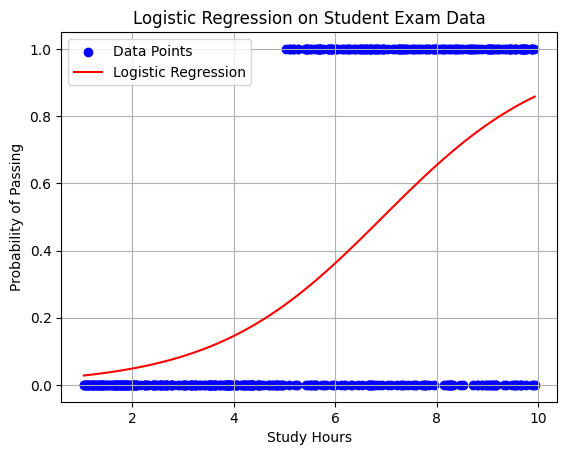

In [13]:
# prompt: plot how logistic regression work

# Predict probabilities for the entire range of study hours
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_probs = model.predict_proba(X_range)[:, 1]  # Probability of passing

# Plot the data points
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the logistic regression curve
plt.plot(X_range, y_probs, color='red', label='Logistic Regression')

# Add labels and title
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression on Student Exam Data')
plt.legend()
plt.grid(True)
plt.show()
